## metrics


In [1]:
%pip install scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

model = load_model("best_model.keras")
labels = ['glioma','meningioma','no_tumor','pituitary']
X_test = np.load("saved_data/X_test.npy") # each obrazek
y_test = np.load("saved_data/y_test.npy") # spravny popis obrazku -> typ tumoru
y_test_one_shot = to_categorical(y_test, num_classes=4) # prevest z 1D na 2D

y_pred = model.predict(X_test) # predikce modelu pro kazdy obrazek
y_pred_classes = np.argmax(y_pred, axis=1) # "odpovedi modelu" list s tridami ktere hada model



2026-01-04 18:22:54.468215: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1767547378.196996   23567 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9295 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:09:00.0, compute capability: 8.6
/home/kosi/Desktop/brain tumor classification/brain tumor mri classifier/venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2026-01-04 18:23:01.671936: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 797442

 5/32 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

I0000 00:00:1767547388.809141   23738 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step


In [3]:
loss, accuracy = model.evaluate(X_test, y_test_one_shot)
print("Loss:", loss)
print("Accuracy:", accuracy)

2026-01-04 18:23:14.652328: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 797442048 exceeds 10% of free system memory.
2026-01-04 18:23:15.404180: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 797442048 exceeds 10% of free system memory.


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.9418 - loss: 0.1595
Loss: 0.15947046875953674
Accuracy: 0.9418146014213562



Classification Report:
              precision    recall  f1-score   support

      glioma     0.9665    0.9023    0.9333       256
  meningioma     0.8556    0.9390    0.8953       246
    no_tumor     0.9728    0.9766    0.9747       256
   pituitary     0.9798    0.9492    0.9643       256

    accuracy                         0.9418      1014
   macro avg     0.9437    0.9418    0.9419      1014
weighted avg     0.9445    0.9418    0.9424      1014



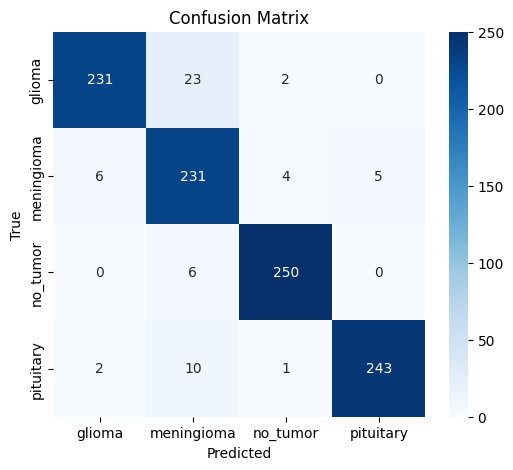

In [4]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=labels, digits=4))

conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')    #TODO kdyztak pridat ze se nebude pouzivat i seaborn ale jen matplotlib
plt.xlabel('Predicted')
plt.ylabel('True') 
plt.title('Confusion Matrix')
plt.show()

AUC: 0.9911052935356199


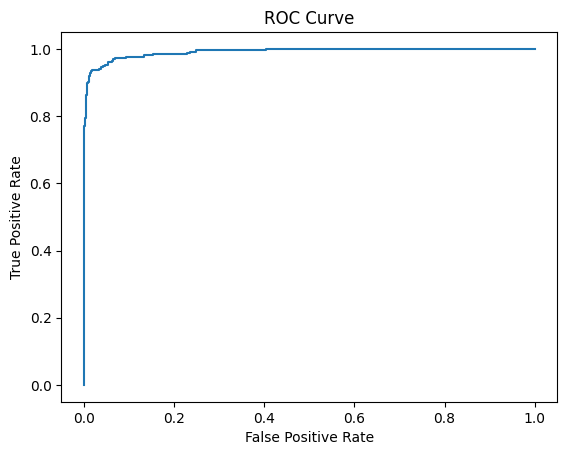

In [5]:
fpr, tpr, thresholds = roc_curve(y_test_one_shot[:,0], y_pred[:,0])
auc = roc_auc_score(y_test_one_shot[:,0], y_pred[:,0])
print("AUC:", auc)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show() # vlevo 0.8 -> 80% obrazku bylo spravne oznacenoS